<h1>Simple Linear Regression</h1>
with one independent variable <br><br>
Going to create a simple <b>linear regression</b> tool based on the equation of a line:<br><br>
$$y=mx+c$$ <br>

<br>** Everything is good until I try to undo the standardisation - see the very end.**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up the X values.

# Anscombe's Quartet - Set 1 - X Values

X=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0 ,12.0 ,7.0, 5.0], dtype="float64")

X.flags.writeable = False   # Protecting the contents of X - make it immutable (ie. read only).

In [3]:
# Set up the Y values.


# Anscombe's Quartet - Set 1 - Y Values

Y=np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68], dtype="float64")

Y.flags.writeable = False  # Protecting the contents of Y - make it immutable (ie. read only).


X min & max: 4.0 14.0
Y min & max: 4.26 10.84


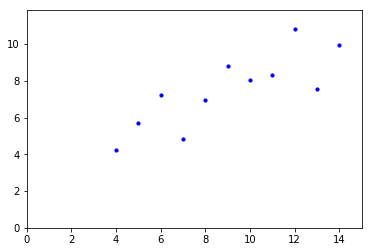

In [4]:
# Setting up some global values and also plotting the data to get a feel for it.

Xmin=np.min(X)
Xmax=np.max(X)
Ymin=np.min(Y)
Ymax=np.max(Y)
print("X min & max:", Xmin, Xmax)
print("Y min & max:", Ymin, Ymax)


# plt.xlim(Xmin-1,Xmax+1)
plt.xlim(0,Xmax+1)
plt.ylim(0,Ymax+1)

plt.scatter(X,Y, 10, color = 'blue')
plt.show()

We now want to "standardise" the data. This will make the optimisation quicker. There are various ways to standardise the data but I am going to set the minimum value to 0 and the maximum value to 1. 

The formula is $$ x_{new} = \frac{ x_{orig} - x_{min}}{x_{max} - x_{min}} $$


<b>Post Script</b>: The optimisation method that I use later, gradient descent using the Sum of Square Errors function(SSE), does not work unless the data is standardised. Go ahead and try it. If you do not standarise, the optimisation blows up! 

<b>To Try</b>: Implement the optimisation with another error function.

i=  0 		x   0.60 	y   0.57
i=  1 		x   0.40 	y   0.41
i=  2 		x   0.90 	y   0.50
i=  3 		x   0.50 	y   0.69
i=  4 		x   0.70 	y   0.62
i=  5 		x   1.00 	y   0.87
i=  6 		x   0.20 	y   0.45
i=  7 		x   0.00 	y   0.00
i=  8 		x   0.80 	y   1.00
i=  9 		x   0.30 	y   0.09
i=  10 		x   0.10 	y   0.22


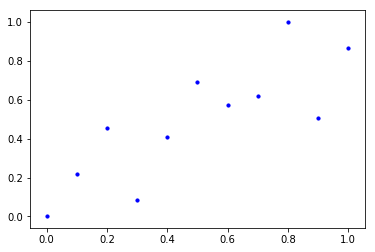

In [5]:
X_s=np.empty_like(X, dtype="float64")     # X_s  X standardised
Y_s=np.empty_like(Y, dtype="float64")     # Y_s  Y standardised

X_s = (X - Xmin)/(Xmax-Xmin)
Y_s = (Y - Ymin)/(Ymax-Ymin)


for i in range(0, X.size):
    print("i= ", i, "\t\tx {:6.2f}".format(X_s[i]),"\ty {:6.2f}".format(Y_s[i]))



plt.scatter(X_s,Y_s, 10, color = 'blue')
plt.show()

<br>We need to calculate the values of Y that are produced by our equation $y=mx+c$ equation.<br>

In [6]:
def CalculateNewY(X_orig, slope, intercept):
    
    Y_calc = np.empty_like(X_orig, dtype="float64")

    Y_calc = X_orig*slope+intercept
        
    return Y_calc

For the Cost Function we are going to use the Sum of Squared Errors (SSE) function, which we define as follows:<br><br>
$$\frac{1}{2}\sum_{1}^n (y-\hat{y})^2  $$
<br>
$y$ is the sample value - the one that is given. <br>
$\hat{y}$ is the predicted value for the same x using the equation.<br><br>
Initially the difference between these, $y-\hat{y}$, will be large but by minimising the SSE equation we should be able to reduce this difference to be negligible.

In [7]:
def CalculateSSE(original_Y, predicted_Y):
    theSSE=0.0
    
    for i in range(0, original_Y.size):
        theSSE += (original_Y[i]-predicted_Y[i])**2
        
    theSSE = theSSE/2
    
    return theSSE

You need to next get the gradients of the Cost Function - these are the partial derivatives of the SSE wrt the slope and the intercept <br><br>
$$ \frac{\partial SSE}{\partial m} and \frac{\partial SSE}{\partial c}$$


Eventually we are going to take the partial derivatives w.r.t. m and c of SE but we need to prepare SE first. That is, to get a form of it that makes taking the partial derivatives possible.<br>

$$
\begin{eqnarray}
SE = \frac{1}{2}(y-\hat{y})^2  \\
SE = \frac{1}{2}(y^2+\hat{y}^2 -2y\hat{y}) 
\end{eqnarray}
$$


Recall that $\hat{y}=mx+c$ gives us...
$$
\begin{eqnarray}
SE = \frac{1}{2}(y^2+(mx+c)^2-2y(mx+c)) \\
SE = \frac{1}{2}(y^2+m^2x^2+c^2+2mxc -2ymx -2yc )
\end{eqnarray}
$$
<br><br> We now need to take partial derivatives w.r.t. m and c (
$ \frac{\partial SE}{\partial m} $ and $ \frac{\partial SE}{\partial c} $) <br><br>

$$
\begin{eqnarray}
\frac{\partial SE}{\partial m} = \frac{1}{2} (2mx^2+2xc-2yx)    \\  
\\
\frac{\partial SE}{\partial m} = mx^2+xc-yx \\
\\
\frac{\partial SE}{\partial m} =x(mx+c-y)  
\end{eqnarray}
$$

Recall $\hspace{1cm} \hat{y}=mx+c $

$$ \frac{\partial SE}{\partial m} =x( \hat{y}-y)$$
This can also be written as
$$ \frac{\partial SE}{\partial m} = -( y - \hat{y})x$$
On to the partial derivative of SE w.r.t. <b>c</b>.
$$
\begin{eqnarray}
\frac{\partial SE}{\partial c} = \frac{1}{2} (2c+2mx-2y) \\
\frac{\partial SE}{\partial c} = c+mx-y  \\
\frac{\partial SE}{\partial c} = mx+c-y  \\
\end{eqnarray}
$$

Recall $\hspace{1cm} \hat{y}=mx+c        $
$$\frac{\partial SE}{\partial c} =  \hat{y}-y   $$ 
This can also be written as
$$\frac{\partial SE}{\partial c} = -(y- \hat{y})   $$ 

<br><br>
$\frac{\partial SSE}{\partial m} is just the \sum \frac{\partial SE}{\partial m}  $ <br><br>and<br><br> $\frac{\partial SSE}{\partial c} is just the \sum \frac{\partial SE}{\partial c} $.

In [8]:
def SumPartialDerivativeOf_m (original_Y, calculated_Y , original_X):
    
    theSPD_m = 0.0
    
    for i in range(0, original_Y.size):
        theSPD_m += original_X[i] *(calculated_Y[i]-original_Y[i])      

    return theSPD_m

In [9]:
def SumPartialDerivativeOf_c (original_Y, calculated_Y ):
    
    theSPD_c = 0.0
    
    for i in range(0, original_Y.size):
        theSPD_c +=  calculated_Y[i] - original_Y[i]

        
    return theSPD_c

We now need to update <b>m</b> and <b>c</b> so that they become better values. Recall that we start off with random values of <b>m</b> abd <b>c</b>. The update rules are:

$$ m_{new}= m -r \sum \frac{\partial SE}{\partial m} $$
<br>
$$ c_{new}= c -r \sum \frac{\partial SE}{\partial c} $$
<br>
<br>
<b>r</b> is the learning rate, the pace of adjustment of <b>m</b> and <b> c</b>.

In [10]:
# Helper function

def DrawLineFromFormula(slope, intercept, color):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-100, 100, 0.1)
    plt.plot(x, slope*x+intercept, color)
    return

To get better and better values for m and c you re-run the following code:


In [11]:
# The Iteration

# This is where we iterate until the optimistaion equation has stopped getting any better

def trials( m = 1, c = 0.75 , r= 0.01, acceptableDifference = 0.000001, maxNumOfTrials = 10000 ):

    SSE_storage = []
    
    recordOfIterations = []
    recordOfSlope = []
    recordOfIntercept = []
    recordOfSSE = []
    

    for i in range(0, maxNumOfTrials):    
    
        Y_hat = CalculateNewY(X_s, m, c)

        ourSSE = CalculateSSE(Y_s,Y_hat)
    
        SSE_storage.append(ourSSE)    # This list is used to store the SSE errors - used for plotting later.
        
 
        if ( i > 0):
            
            if ( abs(oldSSE-ourSSE) < acceptableDifference):
                print("\nAfter ", i, "iterations - we are done({:.10f})!\n\nOld SSE:".format(acceptableDifference),oldSSE, " new SSE: ", ourSSE, "\t Difference < {:12.10f}".format(oldSSE-ourSSE),"\n" )
                
                # Make sure to store the last value !
        
                recordOfIterations.append(i)
                recordOfSlope.append(m)
                recordOfIntercept.append(c)
                recordOfSSE.append(ourSSE)        
                break
    
            if( ourSSE > oldSSE):
                print("Error adjustment process going the wrong way ...abort.")
                break


        ourSPD_m = SumPartialDerivativeOf_m( Y_s, Y_hat, X_s)
        ourSPD_c = SumPartialDerivativeOf_c( Y_s, Y_hat)

        m = m - r*ourSPD_m
        c = c - r*ourSPD_c

        if (i%100 == 0):
#       print("{:12}".format(i),"{:12.6f}".format(m), "{:12.6f}".format(c), "{:16.14f}".format(ourSSE))
            recordOfIterations.append(i)
            recordOfSlope.append(m)
            recordOfIntercept.append(c)
            recordOfSSE.append(ourSSE)
        
        if((i%100 ==0)):
            DrawLineFromFormula(m, c, 'g--')
            
        oldSSE = ourSSE
        

# Show the table of values

    whatHappened = pd.DataFrame({"Iterations":recordOfIterations, 
                                "Slope":recordOfSlope,
                                "c":recordOfIntercept,    
                                "SSE":recordOfSSE
                            })

    pd.set_option('display.max_rows', None)
    display(whatHappened)

# Plot the original points and the final line.

    plt.scatter(X_s, Y_s, 30, color = 'blue')

    DrawLineFromFormula(m, c, 'black')
    
    plt.show()

# Plot the SSE - it should show a nice decrease.
# Plotting the error
    
    plt.title("SSE Plot")
    plt.xlabel('Number of iterations')
    plt.ylabel('SSE')
    plt.plot(SSE_storage)
    plt.show()
    

    return m,c


Recall $$y=mx+c$$ We have to choose values for m and c. 
<br><br>
These can be anything but if they are "reasonable" you will need less iterations to converge on good values for m and c. 




After  986 iterations - we are done(0.0000000001)!

Old SSE: 0.15893573712852668  new SSE:  0.15893573702943325 	 Difference < 0.0000000001 



,Iterations,Slope,c,SSE
0,0,0.983100,1.773679,23.504803
1,100,0.540240,0.231801,0.186460
2,200,0.667848,0.162550,0.163777
3,300,0.721363,0.133508,0.159787
4,400,0.743806,0.121328,0.159085
5,500,0.753218,0.116220,0.158962
6,600,0.757166,0.114078,0.158940
7,700,0.758821,0.113180,0.158937
8,800,0.759515,0.112803,0.158936
9,900,0.759806,0.112645,0.158936


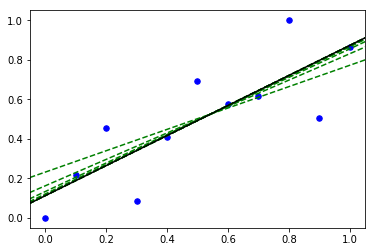

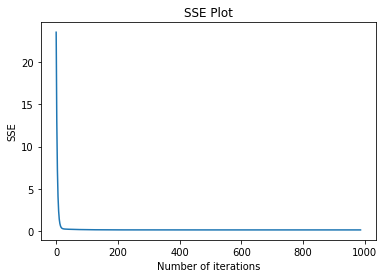

In [12]:
m_slope = 1.1
c_intercept = 2.0
r_learning_rate = .01

m,c = trials( m_slope, c_intercept, r_learning_rate, 0.0000000001, 3000)


Recall that we used the functions, $$ x_{new} = \frac{ x_{orig} - x_{min}}{x_{max} - x_{min}} $$ and $$ y_{new} = \frac{ y_{orig} - y_{min}}{y_{max} - y_{min}} $$<br>, to "standardise" our samples (the x,y pairs we were given at the start). 

Our new <b>m</b> is correct but our <b>c</b> needs to be mapped back to the range that our original y values were in.


To reverse this we need to use the following 

$$ y_{orig} = ({ y_{new} } * (y_{max} - y_{min})) + y_{min}  $$

We need to execute this once to map our <b>c</b> back to the orginal range.

0.7599161158521673 0.11258560597344808
Ymin: 4.26
Y Range: 6.58
m 0.7599 	 final c 5.0008


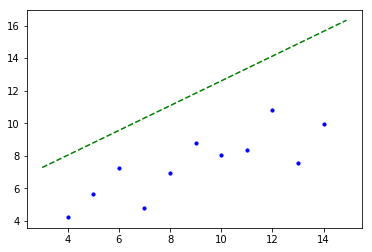

In [13]:
print(m, c)
print("Ymin:", Ymin)
print("Y Range:", Ymax - Ymin)

c_final = (c * (Ymax - Ymin)) + Ymin

print("m {:6.4f}".format(m),"\t final c {:6.4f}".format(c_final))

# plt.xlim(-1,Xmax+1)
# plt.ylim(2,Ymax+1)

x = np.arange(0, Xmax+1, 0.1, dtype="float64")
y = np.empty_like(x, dtype="float64") 
y = m*x + c_final

# plt.plot(x, y, 'black')
# Plot the original points and the final line.

points = np.arange(Xmin-1, Xmax+1, 0.1)
plt.plot(points, m*points+c_final, 'g--')


plt.scatter(X,Y, 10, color = 'blue')
plt.show()

Not correct - the intercept 'c' is far too big. 

**What is the proper way to undo the standardisation of the sample data?**
